In [42]:
import numpy as np
import pandas as pd
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
import indicators
%matplotlib inline

In [43]:
# Reading in stock data 
data = yfinance.download('IDT')
print(data.shape)
data['Date'] = data.index
data.reset_index(drop=True,inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed
(4780, 6)


,Open,High,Low,Close,Adj Close,Volume,Date
0,33.601013,33.601013,33.601013,33.601013,12.179194,0,2001-05-16
1,33.601013,33.601013,33.601013,33.601013,12.179194,0,2001-05-17
2,33.601013,33.601013,33.601013,33.601013,12.179194,0,2001-05-18
3,33.601013,33.601013,33.601013,33.601013,12.179194,0,2001-05-21
4,33.601013,33.601013,33.601013,33.601013,12.179194,0,2001-05-22


In [46]:
for days in [5,7,14,21,50,100]:
    data = indicators.accumulation_distribution(data,days)
    data = indicators.average_true_range(data,days)
    data = indicators.bollinger_bands(data,days)
    data = indicators.commodity_channel_index(data,days)
    data = indicators.coppock_curve(data,days)
    #data = indicators.donchian_channel(data,days)
    data = indicators.ease_of_movement(data,days)
    data = indicators.exponential_moving_average(data,days)
    data = indicators.force_index(data,days)
    data = indicators.keltner_channel(data,days)
    data = indicators.macd(data,days,days)
    data = indicators.momentum(data,days)
    data = indicators.money_flow_index(data,days)
    data = indicators.moving_average(data,days)
    data = indicators.on_balance_volume(data,days)
    data = indicators.rate_of_change(data,days)
    data = indicators.relative_strength_index(data,days)
    data = indicators.standard_deviation(data,days)
    data = indicators.stochastic_oscillator_d(data,days)
    data = indicators.trix(data,days)
    data = indicators.vortex_indicator(data,days)
    
    
    
data = indicators.mass_index(data)
data = indicators.ppsr(data)
data = indicators.stochastic_oscillator_k(data)
data = indicators.ultimate_oscillator(data)    
data = indicators.chaikin_oscillator(data)

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
print(data.shape)
data.tail()

ValueError: columns overlap but no suffix specified: Index(['ATR_5'], dtype='object')

In [20]:
# Calculating next n day price
data['Close5'] = data['Close'].shift(-5)

# Calculating next n direction
data['Direction5'] = data['Close5'] > data['Close']
data = data.dropna()
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Date,Acc/Dist_ROC_5,Acc/Dist_ROC_7,Acc/Dist_ROC_14,...,CCI_50,CCI_100,Copp_5,Copp_7,Copp_14,Copp_21,Copp_50,Copp_100,Close5,Direction5
4765,5.55,5.80,5.54,5.73,5.73,84500,2020-04-27,-9.796976,-22.492446,-1.454504,...,-0.451197,-1.015939,0.048850,0.043635,-0.034100,-0.249322,-0.338359,-0.432275,5.22,False
4766,5.86,5.89,5.45,5.50,5.50,91900,2020-04-28,0.949397,-5.309082,0.150484,...,-0.481026,-1.067225,0.042739,0.041338,-0.019075,-0.225852,-0.347658,-0.432742,5.39,False
4767,5.67,5.80,5.46,5.56,5.56,128100,2020-04-29,-3.191791,10.897857,2.220444,...,-0.455318,-1.053234,0.053563,0.045211,-0.008006,-0.209293,-0.356381,-0.433179,5.41,False
4768,5.50,5.52,5.23,5.40,5.40,109900,2020-04-30,-0.207548,-1.520152,1.034228,...,-0.610179,-1.232020,0.036534,0.032308,-0.002034,-0.184350,-0.366545,-0.434900,5.46,True
4769,5.24,5.41,5.21,5.41,5.41,94400,2020-05-01,1.420517,2.922581,-2.585810,...,-0.617790,-1.244178,0.003294,0.029037,-0.003720,-0.164269,-0.375953,-0.437331,5.78,True
4770,5.28,5.39,5.15,5.22,5.22,69100,2020-05-04,-0.594559,-2.204122,-1.472425,...,-0.679650,-1.300521,-0.031167,0.005709,-0.008906,-0.154016,-0.387327,-0.440318,5.84,True
4771,5.33,5.68,5.22,5.39,5.39,70400,2020-05-05,-0.651826,-1.470903,-186440.984415,...,-0.478304,-1.123730,-0.050749,-0.013305,-0.005188,-0.142001,-0.398717,-0.442239,5.82,True
4772,5.42,5.53,5.31,5.41,5.41,86600,2020-05-06,-1.415493,-0.889135,3.338670,...,-0.461149,-1.118298,-0.038670,-0.017712,-0.003633,-0.130159,-0.410412,-0.444263,5.60,True
4773,5.48,5.68,5.36,5.46,5.46,112700,2020-05-07,-1.447696,-0.198772,-3.564476,...,-0.335889,-1.030379,-0.028694,-0.029561,-0.001026,-0.119904,-0.419974,-0.445175,5.42,False
4774,5.60,5.90,5.60,5.78,5.78,83900,2020-05-08,-1.582808,-0.114429,-4.784986,...,0.015490,-0.792945,0.040087,0.008149,0.018347,-0.093978,-0.427163,-0.444477,5.63,False


In [23]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [24]:
# Creating train and test set
from sklearn.model_selection import train_test_split
X,y = data.drop(['Close5','Direction5','Date'],axis=1),data['Direction5']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_inputs = scaler.fit_transform(X)
scaled_inputs = pd.DataFrame(scaled_inputs,columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(scaled_inputs,y,test_size=.03,random_state=101)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(4200, 43)
(4200,)
(130, 43)
(130,)


,Open,High,Low,Close,Adj Close,Volume,Acc/Dist_ROC_5,Acc/Dist_ROC_7,Acc/Dist_ROC_14,Acc/Dist_ROC_21,...,CCI_14,CCI_21,CCI_50,CCI_100,Copp_5,Copp_7,Copp_14,Copp_21,Copp_50,Copp_100
3662,0.239732,0.240808,0.241438,0.239201,0.641453,0.044871,0.297820,0.670023,0.287201,0.459816,...,0.762160,0.623562,0.407264,0.449794,0.452207,0.536178,0.436593,0.372619,0.398266,0.234492
497,0.788709,0.787495,0.788048,0.780136,0.780059,0.020657,0.297820,0.670023,0.287201,0.459816,...,0.373766,0.367481,0.336385,0.311727,0.415111,0.491958,0.439695,0.410727,0.350254,0.319035
3665,0.242570,0.244640,0.243812,0.241209,0.646704,0.063602,0.297819,0.670025,0.287201,0.459815,...,0.748035,0.678770,0.418343,0.464832,0.463978,0.566463,0.460435,0.377258,0.402114,0.232595
2917,0.269119,0.269129,0.263816,0.262131,0.562810,0.022821,0.297805,0.670020,0.287201,0.459815,...,0.256279,0.252066,0.416794,0.428671,0.390238,0.465093,0.464154,0.488815,0.394165,0.256773
2433,0.132816,0.132235,0.134852,0.133843,0.278576,0.030616,0.297820,0.670023,0.287201,0.459815,...,0.570378,0.598206,0.575934,0.639332,0.439155,0.570554,0.628517,0.608361,0.391754,0.179458


In [25]:
# Network time
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=300, batch_size=100, verbose=2)

Train on 4200 samples, validate on 130 samples
Epoch 1/300
 - 0s - loss: 0.6922 - accuracy: 0.5205 - val_loss: 0.6938 - val_accuracy: 0.5077
Epoch 2/300
 - 0s - loss: 0.6887 - accuracy: 0.5460 - val_loss: 0.6820 - val_accuracy: 0.5462
Epoch 3/300
 - 0s - loss: 0.6855 - accuracy: 0.5495 - val_loss: 0.6798 - val_accuracy: 0.5538
Epoch 4/300
 - 0s - loss: 0.6838 - accuracy: 0.5502 - val_loss: 0.6763 - val_accuracy: 0.5769
Epoch 5/300
 - 0s - loss: 0.6848 - accuracy: 0.5488 - val_loss: 0.6690 - val_accuracy: 0.5923
Epoch 6/300
 - 0s - loss: 0.6805 - accuracy: 0.5662 - val_loss: 0.6773 - val_accuracy: 0.5846
Epoch 7/300
 - 0s - loss: 0.6837 - accuracy: 0.5550 - val_loss: 0.6802 - val_accuracy: 0.5692
Epoch 8/300
 - 0s - loss: 0.6802 - accuracy: 0.5674 - val_loss: 0.6694 - val_accuracy: 0.6000
Epoch 9/300
 - 0s - loss: 0.6785 - accuracy: 0.5600 - val_loss: 0.6658 - val_accuracy: 0.5615
Epoch 10/300
 - 0s - loss: 0.6751 - accuracy: 0.5779 - val_loss: 0.6674 - val_accuracy: 0.5769
Epoch 11/300

Epoch 87/300
 - 0s - loss: 0.4694 - accuracy: 0.7636 - val_loss: 0.6474 - val_accuracy: 0.6846
Epoch 88/300
 - 0s - loss: 0.4707 - accuracy: 0.7648 - val_loss: 0.6870 - val_accuracy: 0.6692
Epoch 89/300
 - 0s - loss: 0.4643 - accuracy: 0.7724 - val_loss: 0.6157 - val_accuracy: 0.6923
Epoch 90/300
 - 0s - loss: 0.4628 - accuracy: 0.7683 - val_loss: 0.6754 - val_accuracy: 0.6769
Epoch 91/300
 - 0s - loss: 0.4579 - accuracy: 0.7726 - val_loss: 0.6327 - val_accuracy: 0.6923
Epoch 92/300
 - 0s - loss: 0.4598 - accuracy: 0.7710 - val_loss: 0.6265 - val_accuracy: 0.6846
Epoch 93/300
 - 0s - loss: 0.4622 - accuracy: 0.7719 - val_loss: 0.6076 - val_accuracy: 0.7308
Epoch 94/300
 - 0s - loss: 0.4637 - accuracy: 0.7729 - val_loss: 0.6330 - val_accuracy: 0.6769
Epoch 95/300
 - 0s - loss: 0.4567 - accuracy: 0.7712 - val_loss: 0.6391 - val_accuracy: 0.6923
Epoch 96/300
 - 0s - loss: 0.4600 - accuracy: 0.7712 - val_loss: 0.6190 - val_accuracy: 0.6692
Epoch 97/300
 - 0s - loss: 0.4495 - accuracy: 0.77

Epoch 173/300
 - 0s - loss: 0.2998 - accuracy: 0.8648 - val_loss: 0.7181 - val_accuracy: 0.7077
Epoch 174/300
 - 0s - loss: 0.2978 - accuracy: 0.8671 - val_loss: 0.7393 - val_accuracy: 0.7077
Epoch 175/300
 - 0s - loss: 0.2840 - accuracy: 0.8812 - val_loss: 0.7479 - val_accuracy: 0.7077
Epoch 176/300
 - 0s - loss: 0.2729 - accuracy: 0.8826 - val_loss: 0.7857 - val_accuracy: 0.7154
Epoch 177/300
 - 0s - loss: 0.2794 - accuracy: 0.8812 - val_loss: 0.8008 - val_accuracy: 0.7000
Epoch 178/300
 - 0s - loss: 0.2999 - accuracy: 0.8702 - val_loss: 0.8663 - val_accuracy: 0.6923
Epoch 179/300
 - 0s - loss: 0.2727 - accuracy: 0.8812 - val_loss: 0.7700 - val_accuracy: 0.7154
Epoch 180/300
 - 0s - loss: 0.2745 - accuracy: 0.8821 - val_loss: 0.7718 - val_accuracy: 0.7154
Epoch 181/300
 - 0s - loss: 0.2710 - accuracy: 0.8833 - val_loss: 0.8281 - val_accuracy: 0.7077
Epoch 182/300
 - 0s - loss: 0.2800 - accuracy: 0.8771 - val_loss: 0.8519 - val_accuracy: 0.7154
Epoch 183/300
 - 0s - loss: 0.2656 - acc

Epoch 259/300
 - 0s - loss: 0.1852 - accuracy: 0.9252 - val_loss: 1.0313 - val_accuracy: 0.7154
Epoch 260/300
 - 0s - loss: 0.1871 - accuracy: 0.9262 - val_loss: 1.0543 - val_accuracy: 0.7000
Epoch 261/300
 - 0s - loss: 0.1658 - accuracy: 0.9398 - val_loss: 1.0787 - val_accuracy: 0.7231
Epoch 262/300
 - 0s - loss: 0.1616 - accuracy: 0.9417 - val_loss: 1.0412 - val_accuracy: 0.7077
Epoch 263/300
 - 0s - loss: 0.1714 - accuracy: 0.9362 - val_loss: 1.1372 - val_accuracy: 0.7308
Epoch 264/300
 - 0s - loss: 0.2030 - accuracy: 0.9198 - val_loss: 1.0549 - val_accuracy: 0.6923
Epoch 265/300
 - 0s - loss: 0.1953 - accuracy: 0.9195 - val_loss: 1.1093 - val_accuracy: 0.7231
Epoch 266/300
 - 0s - loss: 0.1784 - accuracy: 0.9236 - val_loss: 1.0416 - val_accuracy: 0.7385
Epoch 267/300
 - 0s - loss: 0.1636 - accuracy: 0.9379 - val_loss: 1.1151 - val_accuracy: 0.7231
Epoch 268/300
 - 0s - loss: 0.1752 - accuracy: 0.9352 - val_loss: 1.0826 - val_accuracy: 0.7077
Epoch 269/300
 - 0s - loss: 0.1925 - acc

In [26]:
preds = model.predict(X_test)
preds = [i > .50 for i in preds]
predicted = []
for pred in preds:
    val = pred[0]
    predicted.append(val)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

       False       0.74      0.77      0.76        71
        True       0.71      0.68      0.70        59

    accuracy                           0.73       130
   macro avg       0.73      0.73      0.73       130
weighted avg       0.73      0.73      0.73       130

[[55 16]
 [19 40]]


In [ ]:
import matplotlib.pyplot as plt

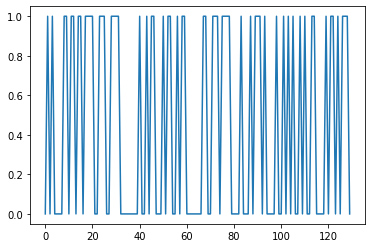

In [40]:
x = np.arange(0,130,1)
plt.plot(x,y_test)